### Autoreload

Autoreload allows the notebook to dynamically load code: if we update some helper functions *outside* of the notebook, we do not need to reload the notebook.

In [249]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [250]:
# All auxiliary code is in ../src

import sys

sys.path.append("../src/")

# Data understanding - Cyclists Dataset

As first thing we imported all the necessary modules.

In [280]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


Dataset loading

In [252]:
cyclists = pd.read_csv('../dataset/cyclists.csv', sep=",")

In [253]:
cyclists.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


As we can see, each data object of the _cyclists_ dataset contains some information about a cyclist, in particular the _name_, the _birth year_, the _weight_, the _height_ and the nationality.
Let's see which column types are automatically inferred by Python.

In [254]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


# Stats on attributes

Custom procedure that produces some basic statistics on a single feature of the dataset.

In [255]:
from matplotlib import pyplot as plt
import numpy as np

#'box' parameter enables the boxplot representation
def stats(column, box=False):
    print(f"Description of attribute '{column.name}':")
    display(column.describe())
    print("\nUnique values:")
    print(column.unique())
    mv = column.isna().sum()
    nrec = cyclists.shape[0]
    per=mv*100/nrec
    print(f"\nNull values: {mv} over {nrec} records - ({per:.2f}%)")
    print("\nTop 5 common value:" + "\n"+str(column.value_counts().head()))
    
   
    if box:
        boxplot_dict = plt.boxplot(column[~np.isnan(column)])
        #recover outliers from boxplot
        outliers = [flier.get_ydata() for flier in boxplot_dict['fliers']]
        #get the list of outliers without duplicates
        outliers_values = list({value for sublist in outliers for value in sublist})
        print("\nOutliers:", outliers_values)

## _url_

The _url_ is a categorical feature of type string. It represents a kind of cyclist identifier and it follows the format _name-surname_.

In [256]:
stats(cyclists["_url"], box=False)

Description of attribute '_url':


count            6134
unique           6134
top       bruno-surra
freq                1
Name: _url, dtype: object


Unique values:
['bruno-surra' 'gerard-rue' 'jan-maas' ... 'paolo-alberati'
 'jackson-rodriguez' 'ward-vanhoof']

Null values: 0 over 6134 records - (0.00%)

Top 5 common value:
_url
bruno-surra               1
rossano-brasi             1
camilo-andres-suarez      1
marco-gilli               1
nelson-rodriguez-serna    1
Name: count, dtype: int64


There are no missing values in this column. There are no duplicates as each cyclist only appears once in the dataset.

## Name

The name is a categorical feature of type string. This columns contains the name of the cyclist in the format '_Name Surname_'.

In [257]:
stats(cyclists["name"])

Description of attribute 'name':


count             6134
unique            6127
top       Jesús  López
freq                 2
Name: name, dtype: object


Unique values:
['Bruno  Surra' 'Gérard  Rué' 'Jan  Maas' ... 'Paolo  Alberati'
 'Jackson  Rodríguez' 'Ward  Vanhoof']

Null values: 0 over 6134 records - (0.00%)

Top 5 common value:
name
Jesús  López          2
Roman  Kreuziger      2
Alberto  Fernández    2
Antonio  Cabello      2
Andrea  Peron         2
Name: count, dtype: int64


Also in this column there are no missing values but, as we can see in the output of the stats function, there are onli 6127 unique values, which means that there are repetitions of the same name.

In [258]:
name_occurrences=cyclists['name'].value_counts()
duplicate_names=name_occurrences[name_occurrences > 1] #the name is the index of this series
homonyms=duplicate_names.index.tolist()
print(duplicate_names)
print("Homonyms -->",homonyms)

name
Jesús  López          2
Roman  Kreuziger      2
Alberto  Fernández    2
Antonio  Cabello      2
Andrea  Peron         2
Sergio  Domínguez     2
Alessandro  Pozzi     2
Name: count, dtype: int64
Homonyms --> ['Jesús  López', 'Roman  Kreuziger', 'Alberto  Fernández', 'Antonio  Cabello', 'Andrea  Peron', 'Sergio  Domínguez', 'Alessandro  Pozzi']


In [259]:
cyclists[cyclists['name'].isin(homonyms)]

,_url,name,birth_year,weight,height,nationality
347,andrea-peron-1,Andrea Peron,1971.0,70.0,183.0,Italy
1745,roman-kreuziger-sr,Roman Kreuziger,1965.0,NaN,NaN,Czech Republic
2235,alessandro-pozzi2,Alessandro Pozzi,1969.0,NaN,NaN,Italy
2601,roman-kreuziger,Roman Kreuziger,1986.0,65.0,183.0,Czech Republic
2682,andrea-peron,Andrea Peron,1988.0,70.0,178.0,Italy
2862,antonio-cabello-baena,Antonio Cabello,1990.0,67.0,179.0,Spain
2939,jesus-lopez23,Jesús López,1955.0,NaN,NaN,Spain
2953,alberto-fernandez-sainz,Alberto Fernández,1981.0,NaN,NaN,Spain
3238,antonio-cabello,Antonio Cabello,1956.0,NaN,NaN,Spain
4917,sergio-dominguez-rodriguez,Sergio Domínguez,1979.0,NaN,NaN,Spain


Even if there are some cases of homonomy, the _url_ continues to act as a cyclist identifier, since there are some final characters of the _url that make it possible to disambiguate the url of 2 cyclists with the same name-surname.

## Birth Year

_Birth Year_ is a continuous numeric attribute. The float64 column can be cast to int as the unique values are not decimal.

In [260]:
#We use 'Int64' to correctly manage also NaN values
try:
    res = np.all(cyclists['birth_year'] == cyclists['birth_year'].astype('Int64'))
    print(res)
    if res:
        cyclists['birth_year'] = cyclists['birth_year'].astype('Int64')

    cyclists.dtypes
except TypeError:
    print("Not castable!")

True


**TODO** Perchè dopo il cast la funzione stats continua a dire che è un float?

Description of attribute 'birth_year':


count         6121.0
mean     1974.071884
std        15.535834
min           1933.0
25%           1962.0
50%           1974.0
75%           1987.0
max           2004.0
Name: birth_year, dtype: Float64


Unique values:
<IntegerArray>
[1964, 1965, 1996, 1995, 1997, 1998, 1947, 1988, 1984, <NA>, 1982, 1980, 1970,
 1981, 1985, 1954, 1994, 1951, 1973, 1950, 1979, 1957, 1986, 1991, 1974, 1944,
 1962, 2001, 1978, 1952, 1969, 1968, 1943, 1960, 1972, 1975, 1961, 1949, 1966,
 1990, 1989, 1983, 1956, 1992, 1999, 2002, 1993, 1959, 1948, 1971, 1977, 1987,
 1976, 1967, 1963, 2000, 1955, 1942, 1940, 2003, 1946, 1945, 1953, 1941, 1958,
 1933, 1938, 2004, 1939, 1936, 1934, 1937]
Length: 72, dtype: Int64

Null values: 13 over 6134 records - (0.21%)

Top 5 common value:
birth_year
1964    145
1962    141
1970    140
1974    138
1975    133
Name: count, dtype: Int64

Outliers: []


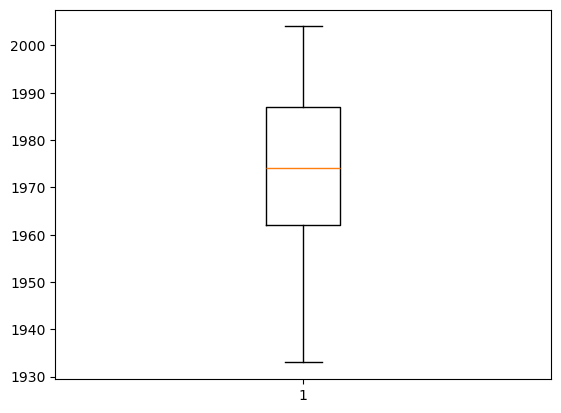

In [261]:
stats(cyclists['birth_year'], box=True)

This dataset contains information on cyclists born between the 1933 and 2004. The most represented year is the 1964. There are not outliers or erroneous values. The columns contains 13 missing values, representing 0.21%, but actually this is not a serious problem as we could find this information using external sources (or the difference between the 'date' and 'cyclist age' fields of the races dataset).

Not Nan: 6121
Bin num: 13


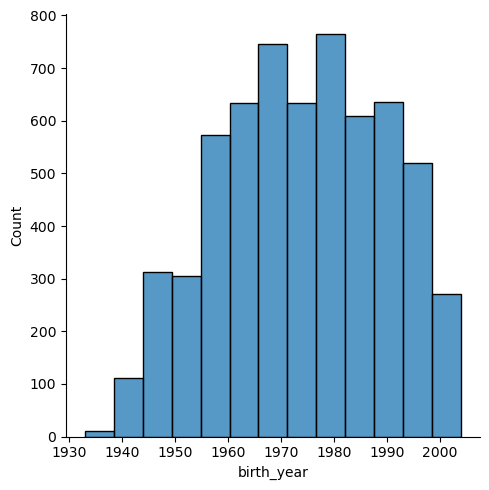

In [262]:
tmp = len(cyclists['birth_year'].dropna(inplace=False))
print("Not Nan:",tmp)

#Sturges' rule
bin_num=int(1+(10/3)*np.log10(tmp))
print("Bin num:",bin_num)
sbn.displot(cyclists, x='birth_year',kind="hist", row_order="desc", bins=bin_num)

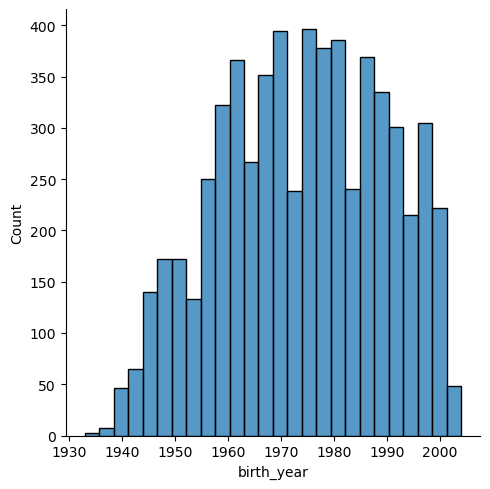

In [263]:
sbn.displot(cyclists, x='birth_year',kind="hist", row_order="desc") 

## Weight

_Weight_ is a continuous numeric attribute. Its type cannot be cast to int because its values have decimal places.

In [264]:
#We use 'Int64' to correctly manage also NaN values
try:
    res = np.all(cyclists['weight'] == cyclists['weight'].astype('Int64'))
    print("Castable!")
    if res:
        cyclists['weight'] = cyclists['weight'].astype('Int64')
        print(cyclists.dtypes)
except TypeError:
    print("Not castable!")

Not castable!


Description of attribute 'weight':


count    3078.000000
mean       68.658739
std         6.348183
min        48.000000
25%        64.000000
50%        69.000000
75%        73.000000
max        94.000000
Name: weight, dtype: float64


Unique values:
[ nan 74.  69.  78.  55.  67.  71.5 73.  60.  65.  71.  62.  63.  59.
 83.  76.  70.  80.  72.  79.  61.  68.  64.  82.  56.  77.  66.  75.
 58.  53.  57.  91.  81.  88.  85.  84.  86.  67.5 89.  52.  51.  54.
 58.5 48.  90.  63.5 74.5 66.5 78.1 77.5 81.4 50.  87.  62.5 93.  73.5
 79.5 65.1 92.  94. ]

Null values: 3056 over 6134 records - (49.82%)

Top 5 common value:
weight
70.0    272
68.0    219
65.0    193
67.0    177
72.0    169
Name: count, dtype: int64

Outliers: [48.0, 50.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0]


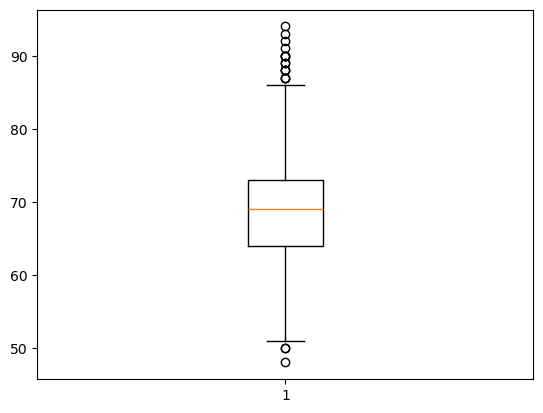

In [265]:
stats(cyclists['weight'], box=True)

Not Nan: 3078
Bin num: 12


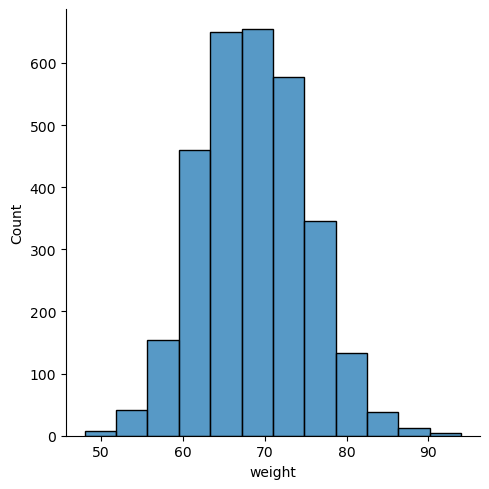

In [266]:
tmp = len(cyclists['weight'].dropna(inplace=False))
print("Not Nan:",tmp)

#Sturges' rule
bin_num=int(1+(10/3)*np.log10(tmp))
print("Bin num:",bin_num)
sbn.displot(cyclists, x='weight',kind="hist", row_order="desc", bins=bin_num)

15


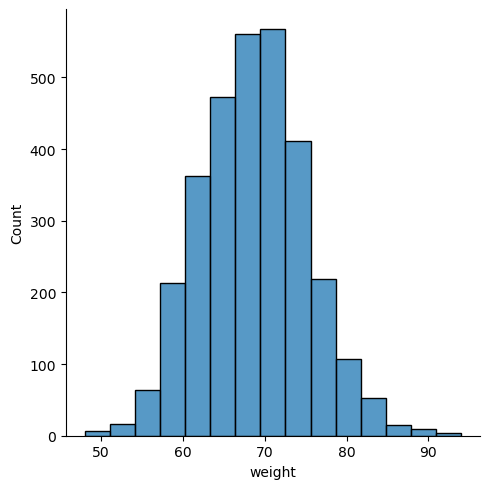

In [267]:
bin_num=bin_num+3
print(bin_num)
sbn.displot(cyclists, x='weight',kind="hist", row_order="desc", bins=bin_num)

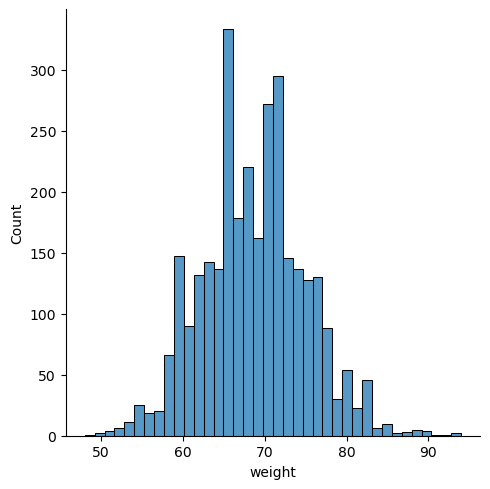

In [268]:
sbn.displot(cyclists, x='weight',kind="hist", row_order="desc")

The critical point here is the fact that there are the 49% of missing values. This result suggests that it may not be possible to do a good imputation that preserves significant values for this column! There are some outliers in this column, in particular cyclists whose weight is greater than 86 or less than 52. As expected the distribution of the weights follows more or less a normal distribution.

## Height

_Height_ is a continuous numeric attribute. Its type cannot be cast to int because its values have decimal places.

In [269]:
#We use 'Int64' to correctly manage also NaN values
try:
    res = np.all(cyclists['height'] == cyclists['height'].astype('Int64'))
    print("Castable")
    if res:
        cyclists['height'] = cyclists['height'].astype('Int64')
        print(cyclists.dtypes)
except TypeError:
    print("Not castable!")

Castable
_url            object
name            object
birth_year       Int64
weight         float64
height           Int64
nationality     object
dtype: object


Description of attribute 'height':


count        3143.0
mean     179.815145
std        6.443447
min           154.0
25%           175.0
50%           180.0
75%           184.0
max           204.0
Name: height, dtype: Float64


Unique values:
<IntegerArray>
[<NA>,  182,  189,  192,  171,  177,  191,  175,  178,  181,  172,  174,  180,
  164,  170,  184,  185,  186,  190,  179,  193,  167,  173,  176,  183,  166,
  187,  188,  195,  169,  198,  194,  168,  199,  204,  154,  165,  159,  160,
  196,  162,  161,  163,  155,  158,  197,  202,  157,  200]
Length: 49, dtype: Int64

Null values: 2991 over 6134 records - (48.76%)

Top 5 common value:
height
180    277
178    226
183    193
181    181
175    169
Name: count, dtype: Int64

Outliers: [160, 161, 198, 199, 200, 202, 204, 154, 155, 157, 158, 159]


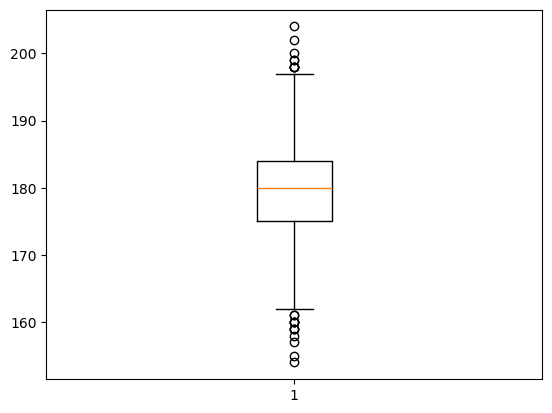

In [270]:
stats(cyclists['height'], box=True)

Not Nan: 3143
Bin num: 12


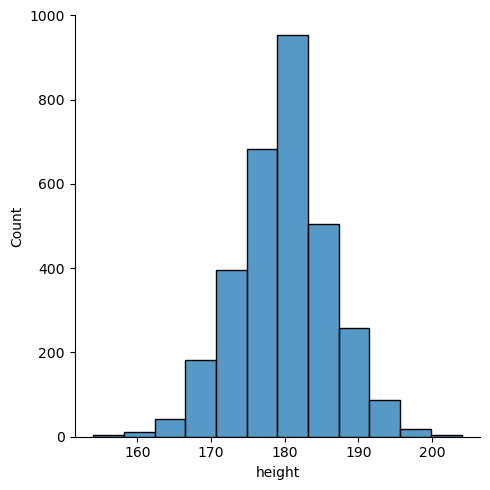

In [271]:
tmp = len(cyclists['height'].dropna(inplace=False))
print("Not Nan:",tmp)

#Sturges' rule
bin_num=int(1+(10/3)*np.log10(tmp))
print("Bin num:",bin_num)
sbn.displot(cyclists, x='height',kind="hist", row_order="desc", bins=bin_num)

15


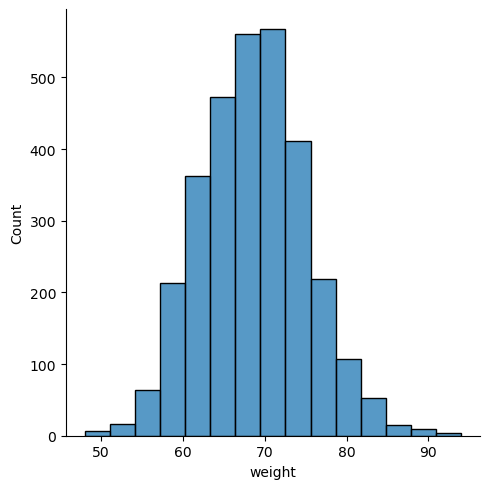

In [272]:
bin_num=bin_num+3
print(bin_num)
sbn.displot(cyclists, x='weight',kind="hist", row_order="desc", bins=bin_num)

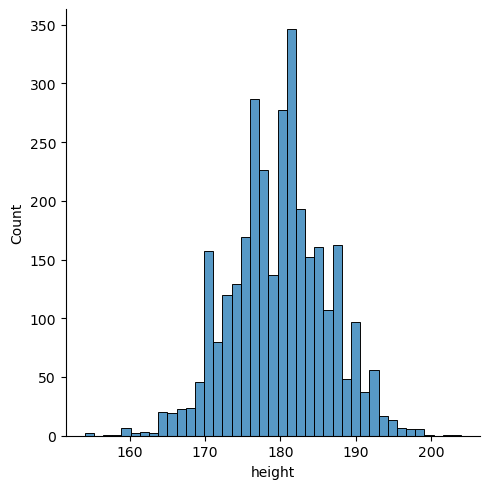

In [273]:
sbn.displot(cyclists, x='height',kind="hist", row_order="desc")

The critical point here is the fact that there are the 49% of missing values. This result suggests that it may not be possible to do a good imputation that preserves significant values for this column! There are some outliers in this column, in particular cyclists whose height is greater than 197 or less than 162. As expected the distribution of the heights follows more or less a normal distribution.

## Nationality

_Nationality_ is a categorical feature of type string. It represents the nationality of the cylist described by that row.

In [274]:
stats(cyclists['nationality'], box=False)

Description of attribute 'nationality':


count      6133
unique       72
top       Italy
freq       1029
Name: nationality, dtype: object


Unique values:
['Italy' 'France' 'Netherlands' 'Belgium' 'Spain' 'United States' nan
 'Norway' 'Russia' 'Poland' 'Germany' 'Australia' 'Switzerland' 'Ireland'
 'Denmark' 'Great Britain' 'Colombia' 'South Africa' 'Argentina'
 'New Zealand' 'Lithuania' 'Portugal' 'Austria' 'Yugoslavia' 'Estonia'
 'Romania' 'Slovenia' 'Canada' 'Latvia' 'Luxembourg' 'Sweden'
 'Czech Republic' 'Slovakia' 'Morocco' 'Ukraine' 'Ethiopia' 'Belarus'
 'Venezuela' 'Japan' 'Mexico' 'Croatia' 'Kazakhstan' 'Uruguay' 'Israel'
 'Namibia' 'Eritrea' 'Costa Rica' 'Taiwan' 'Azerbaijan' 'Hungary'
 'Moldova' 'Panama' 'Finland' 'Bulgaria' 'Serbia' 'Brazil' 'Iran' 'Greece'
 'Chile' 'Ecuador' 'China' 'Albania' 'Guatemala' 'Uzbekistan' 'Algeria'
 'Tunisia' 'Monaco' 'Rwanda' 'Dominican Republic' 'Liechtenstein'
 'Zimbabwe' 'Puerto Rico' 'Hongkong']

Null values: 1 over 6134 records - (0.02%)

Top 5 common value:
nationality
Italy          1029
Spain           872
Belgium         869
France          741
Netherlands     380
Name: 

We can see that there is only one missing value, which can easily be solved by using external sources of information. We can see that the country with the most entries is Italy. In total, 72 countries are represented. These values can be discretized by considering groups of countries such as contients (such as Africa, Oceania, America, Europe, etc.) or geographical areas (North America, Eastern Europe, etc.).

In [275]:
unique_nationalities=cyclists['nationality'].dropna().unique()
sorted(unique_nationalities)

['Albania',
 'Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Germany',
 'Great Britain',
 'Greece',
 'Guatemala',
 'Hongkong',
 'Hungary',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Mexico',
 'Moldova',
 'Monaco',
 'Morocco',
 'Namibia',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Panama',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Romania',
 'Russia',
 'Rwanda',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Tunisia',
 'Ukraine',
 'United States',
 'Uruguay',
 'Uzbekistan',
 'Venezuela',
 'Yugoslavia',
 'Zimbabwe']

There are no typing problems in the nationalities.

In [276]:
# Countries grouped by continent
africa = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cape Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
    'Republic of the Congo', 'Democratic Republic of the Congo', 'Djibouti',
    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia',
    'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
    'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
    'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone',
    'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
    'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

america = [
    'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize',
    'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
    'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador',
    'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica',
    'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Saint Kitts and Nevis',
    'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'United States',
    'Uruguay', 'Venezuela', 'Puerto Rico'
]

asia = [
    'Afghanistan', 'Saudi Arabia', 'Armenia', 'Azerbaijan', 'Bahrain',
    'Bangladesh', 'Bhutan', 'Myanmar', 'Cambodia', 'China', 'Cyprus',
    'North Korea', 'South Korea', 'United Arab Emirates', 'Philippines',
    'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Laos', 'Lebanon',
    'Malaysia', 'Maldives', 'Mongolia', 'Nepal', 'Oman', 'Pakistan', 'Qatar',
    'Russia', 'Singapore', 'Sri Lanka', 'Syria', 'Tajikistan', 'Taiwan',
    'Thailand', 'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Vietnam',
    'Yemen', 'Israel', 'Iran', 'Hongkong'
]

europe = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Denmark', 'Estonia',
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg',
    'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
    'North Macedonia', 'Norway', 'Poland', 'Portugal', 'United Kingdom', 'Great Britain',
    'Czech Republic', 'Romania', 'Russia', 'San Marino', 'Serbia',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
    'Vatican City', 'Liechtenstein', 'Yugoslavia'
]

oceania = [
    'Australia', 'Federated States of Micronesia', 'Fiji',
    'Kiribati', 'Marshall Islands', 'Nauru', 'New Zealand', 'Palau',
    'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu',
    'Vanuatu'
]

In [277]:
cyclists.loc[cyclists.nationality.isin(europe), "continent"] = "Europe"
cyclists.loc[cyclists.nationality.isin(asia), "continent"] = "Asia"
cyclists.loc[cyclists.nationality.isin(america), "continent"] = "America"
cyclists.loc[cyclists.nationality.isin(africa), "continent"] = "Africa"
cyclists.loc[cyclists.nationality.isin(oceania), "continent"] = "Ocenania"

**TODO** Non mi va l'inserzione di una descrizione del grafico

<Axes: xlabel='continent', ylabel='count'>

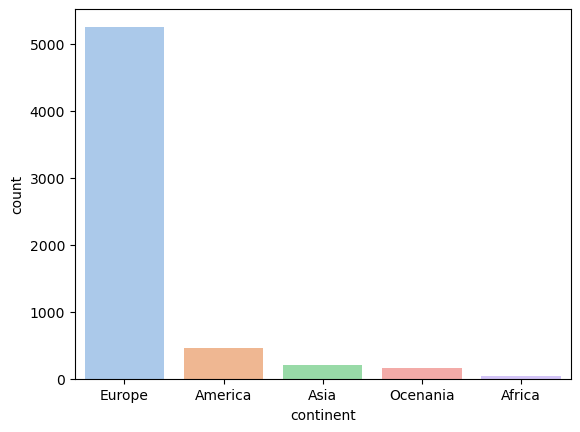

In [287]:
import matplotlib.pyplot as plt
sbn.countplot(x='continent', data=cyclists, palette='pastel', hue='continent', legend=False)
#plt.title("Distribution of Cyclists by Continent")
#plt.show()



In [288]:
northern_europe = [
    'Denmark', 'Estonia', 'Finland', 'Iceland', 'Ireland', 
    'Latvia', 'Lithuania', 'Norway', 'Sweden', 'United Kingdom'
]

eastern_europe = [
    'Belarus', 'Bulgaria', 'Czech Republic', 'Hungary', 
    'Moldova', 'Poland', 'Romania', 'Russia', 'Slovakia', 'Ukraine'
]

western_europe = [
    'Austria', 'Belgium', 'France', 'Germany', 'Luxembourg', 
    'Netherlands', 'Switzerland'
]

southern_europe = [
    'Albania', 'Andorra', 'Bosnia and Herzegovina', 'Croatia', 'Greece', 
    'Italy', 'Kosovo', 'Malta', 'Monaco', 'Montenegro', 'North Macedonia', 
    'Portugal', 'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Vatican City'
]

central_europe = [
    'Austria', 'Czech Republic', 'Germany', 'Hungary', 
    'Poland', 'Slovakia', 'Slovenia', 'Switzerland'
]

cyclists.loc[cyclists.nationality.isin(northern_europe), "continent"] = "Northern Europe"
cyclists.loc[cyclists.nationality.isin(eastern_europe), "continent"] = "Eastern Europe"
cyclists.loc[cyclists.nationality.isin(western_europe), "continent"] = "Western Europe"
cyclists.loc[cyclists.nationality.isin(southern_europe), "continent"] = "Southern Europe"
cyclists.loc[cyclists.nationality.isin(central_europe), "continent"] = "Central Europe"

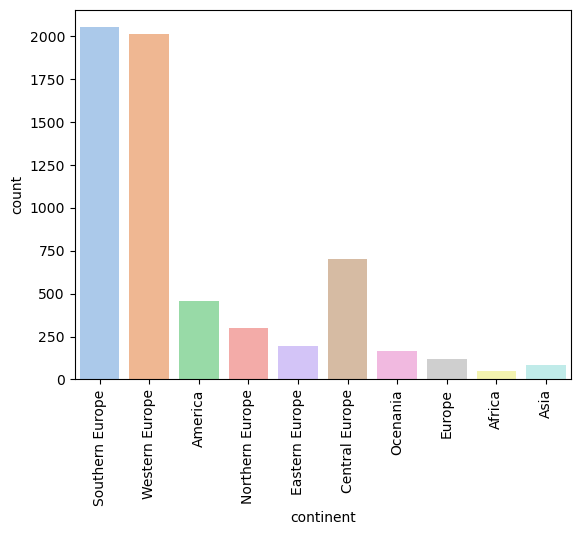

In [291]:
import matplotlib.pyplot as plt
sbn.countplot(x='continent', data=cyclists, palette='pastel', hue='continent', legend=False)
plt.xticks(rotation=90);

In [202]:
cyclists[cyclists['continent'].isna()] #1 MV because 

,_url,name,birth_year,weight,height,nationality,continent
9,scott-davies,Scott Davies,<NA>,NaN,<NA>,NaN,NaN


## BMI

In [302]:
cyclists['BMI'] = (cyclists['weight'] / ((cyclists['height']/100) ** 2)).round(2)
cyclists

,_url,name,birth_year,weight,height,nationality,continent,BMI
0,bruno-surra,Bruno Surra,1964,NaN,<NA>,Italy,Southern Europe,<NA>
1,gerard-rue,Gérard Rué,1965,74.0,182,France,Western Europe,22.34
2,jan-maas,Jan Maas,1996,69.0,189,Netherlands,Western Europe,19.32
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995,78.0,192,Belgium,Western Europe,21.16
4,jose-felix-parra,José Félix Parra,1997,55.0,171,Spain,Southern Europe,18.81
...,...,...,...,...,...,...,...,...
6129,juan-jose-martinez-diaz,Juan José Martínez,1966,NaN,<NA>,Spain,Southern Europe,<NA>
6130,inigo-elosegui,Iñigo Elosegui,1998,75.0,188,Spain,Southern Europe,21.22
6131,paolo-alberati,Paolo Alberati,1973,NaN,<NA>,Italy,Southern Europe,<NA>
6132,jackson-rodriguez,Jackson Rodríguez,1985,58.0,170,Venezuela,America,20.07


Description of attribute 'BMI':


count       3071.0
mean     21.211784
std        1.36741
min          16.41
25%          20.31
50%          21.15
75%          22.09
max          27.77
Name: BMI, dtype: Float64


Unique values:
<FloatingArray>
[ <NA>, 22.34, 19.32, 21.16, 18.81, 21.39,  19.6,  19.8, 19.59, 20.52,
 ...
 25.76, 22.75, 23.34, 24.19, 22.69, 19.28,  25.7, 22.01, 24.98, 18.51]
Length: 433, dtype: Float64

Null values: 3063 over 6134 records - (49.93%)

Top 5 common value:
BMI
20.68    49
21.6     46
20.45    46
20.52    38
21.22    35
Name: count, dtype: Int64

Outliers: [26.75, 24.96, 27.77, 24.9, 25.45, 16.41, 17.62, 16.79, 17.51, 17.63, 16.6, 25.01, 25.95, 24.97, 25.59, 26.3, 26.53, 25.1, 25.43, 25.31, 25.14, 25.22, 25.17, 26.78, 26.49, 24.78, 25.88, 24.98, 25.76, 25.66, 25.61, 25.44, 25.7, 24.91, 25.83, 25.69]


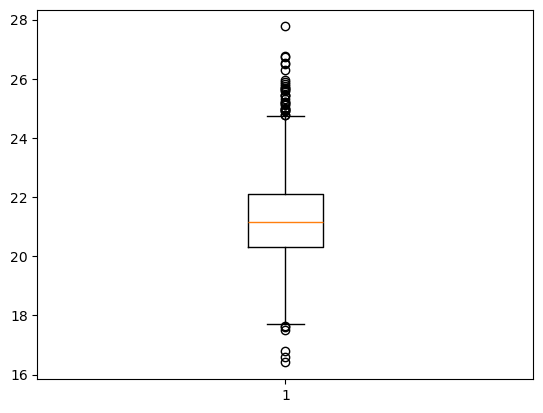

In [304]:
stats(cyclists['BMI'], box=True)

# Correlation analysis
**TODO** Normalizzazione prima della correlazione?

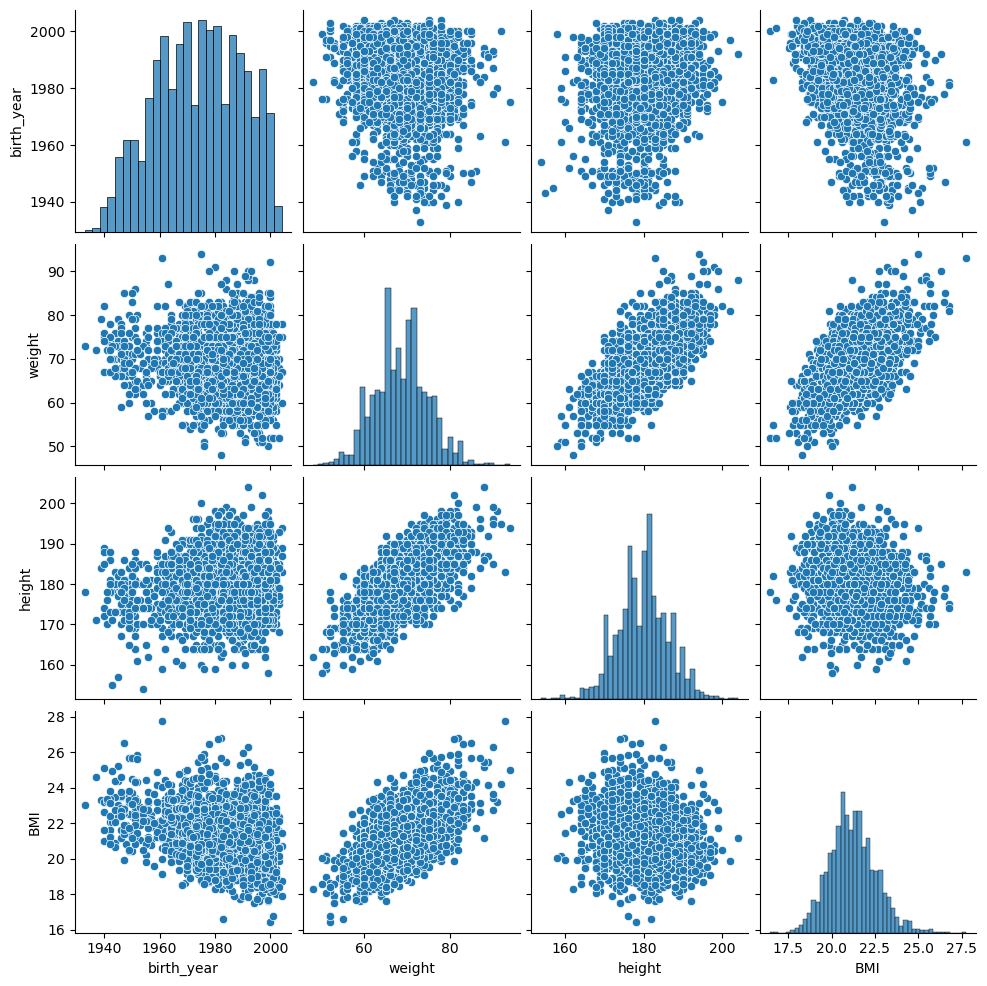

In [305]:
sbn.pairplot(cyclists)

In [308]:
numeric_cyclists = cyclists.select_dtypes(include="number")
correlation_matrix=numeric_cyclists.corr()
correlation_matrix

,birth_year,weight,height,BMI
birth_year,1.000000,-0.104242,0.154252,-0.303064
weight,-0.104242,1.000000,0.720732,0.642693
height,0.154252,0.720732,1.000000,-0.065367
BMI,-0.303064,0.642693,-0.065367,1.000000


TypeError: 'str' object is not callable

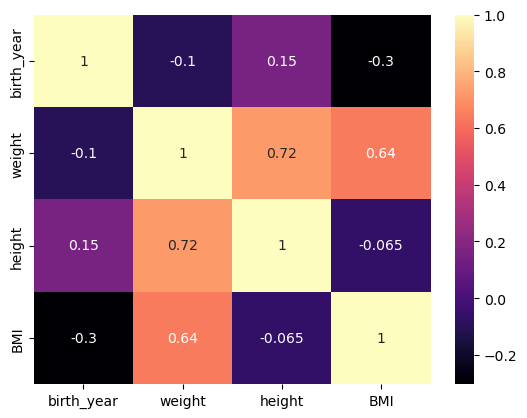

In [314]:
sbn.heatmap(correlation_matrix, annot=True, cmap="magma")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

<Axes: xlabel='height', ylabel='weight'>

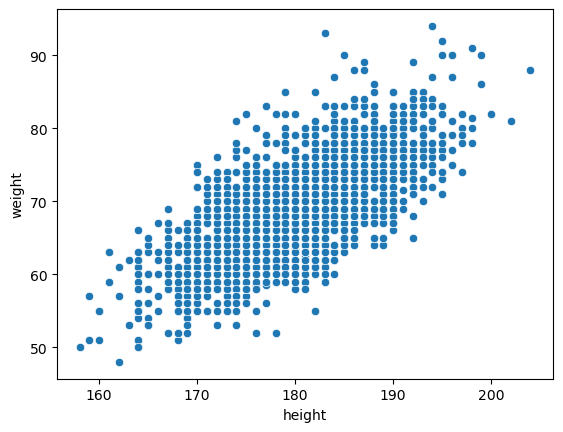

In [317]:
sbn.scatterplot(data=cyclists, x="height", y="weight")

In [315]:
pip install matplotlib

From this analysis we can see that the 'uci_points' and the 'points' are high correlated, so we can choose to maintain only one of them.

We can also see that there is a correlation between 'profile' and 'climb', in fact the profile of a race is a ranking of its difficulty and it is influenced by the climbs.